<img src="./img/HWNI_logo.svg"/>

# Lab - One-Way ANOVA - Solutions

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import util.utils as utils
import util.shared as shared

shared.format_plots()
shared.format_dataframes()

## About the Dataset

For this week's lab, we'll be using some EEG data graciously provided by the [Voytek lab](http://voyteklab.com/about-us/) of UCSD. Participants of varying ages were asked to perform a working memory task with varying levels of difficulty. The raw EEG signal has been summarized into the following two measures:

* [Contralateral Delay Activity](https://www.ncbi.nlm.nih.gov/pubmed/26802451), or CDA, is used to measure the engagement of visual working memory.

* [Frontal Midline Theta](https://www.ncbi.nlm.nih.gov/pubmed/9895201) oscillation amplitude has been correlated with sustained, internally-directed cognitive activity.

The performance of the subjects has also been summarized using the measure
[d'](https://en.wikipedia.org/wiki/Sensitivity_index) (pronounced "d-prime"), also known as the *sensitivity index*. D' is a measure of the subject's performance in  a task. It's based on comparing the true positive rate and false positive rate.

## Loading the Data

First, we load the data and take a look at a sample.

In [2]:
df = pd.read_csv('./data/voytek_working_memory_aging_split.csv',index_col=None)

df.sample(5)

,idx,id,age_split,group,age,difficulty,d,cda,fmt
30,6,7,1,1,21,2,3.61,2.26,1.06
10,10,11,1,1,19,1,4.62,1.89,0.61
68,20,21,3,2,55,3,2.83,3.91,-0.23
26,2,3,2,1,27,2,4.29,1.36,0.22
24,0,1,2,1,26,2,4.89,2.04,0.49


For the purposes of this lab, we're interested only in how task difficulty affects our three measures. We're uninterested in the subject's metadata -- `age_split`, `group`, `age`, and `idx`. Let's begin by dropping those columns from our dataframe using the DataFrame method `drop`.

In [3]:
data = df.drop(['age_split','group','age','idx'], axis=1)
data[data.id == 1]

,id,difficulty,d,cda,fmt
0,1,1,4.86,1.00,0.80
24,1,2,4.89,2.04,0.49
48,1,3,4.55,1.81,0.29


It's good practice to keep an original copy of your dataframe around (here, named `df`) so you can undo irreversible changes, like dropping columns.

If we're interested in looking at subject-by-subject information, we're not quite done with formatting our data. For subject-level analysis, our data is not yet tidy, since a single subject's observations are scattered over multiple rows. Use the `pivot` method to tidy our data. Hint: we want to get our row `index`es from the subject's `id` and to make new `columns` for our measures using the level of `difficulty`. Look back at the last lab for an example of using `pivot`.

In [4]:
pivot_data = data.pivot(index='id',columns='difficulty')

In [5]:
pivot_data.sample(5)

d               cda               fmt            
difficulty     1     2     3     1     2     3     1     2     3
id                                                              
6           3.82  4.18  2.97  0.84  2.12  3.00 -1.12 -0.35 -0.03
13          3.78  3.50  2.29  0.46  0.96  0.55  0.65  0.39  0.42
8           4.52  3.88  4.18  0.45  1.38  3.39 -0.16 -0.58 -0.43
3           4.71  4.29  2.92  0.84  1.36  1.18  0.31  0.22 -0.07
7           4.23  3.61  3.05  1.50  2.26  3.40  0.90  1.06  0.76

It now takes two pieces of information to pick out a particular column: the measure we're interested in (one of `d`, `cda`, or `fmt`) and the `difficulty` level: `1`, `2`, or `3`. These need to be provided in order.

In [6]:
measure = 'cda'
difficulty = 2

pivot_data[measure,difficulty].head()

id
1    2.04
2    0.73
3    1.36
4    1.79
5    0.75
Name: (cda, 2), dtype: float64

If we instead only index into the first level, we get a single-level dataframe back:

In [7]:
pivot_data[measure].head()

difficulty,1,2,3
id,,,
1,1.00,2.04,1.81
2,0.70,0.73,0.80
3,0.84,1.36,1.18
4,1.59,1.79,2.25
5,1.59,0.75,0.98


## Visualizing the Data

Below, we'll be running ANOVA using difficulty as an independent factor and the three measures as dependent factors. Choose a visualization or collection of visualizations that you think would be appropriate for this purpose and plot the data below. Be ready to explain your choice in class.

You can use either the `pivot`ed data frame or the un`pivot`ed data frame.

Hint: the easiest way to apply most of our visualizations to this dataset is to write a loop that runs over our measures and produces a separate plot for each one.

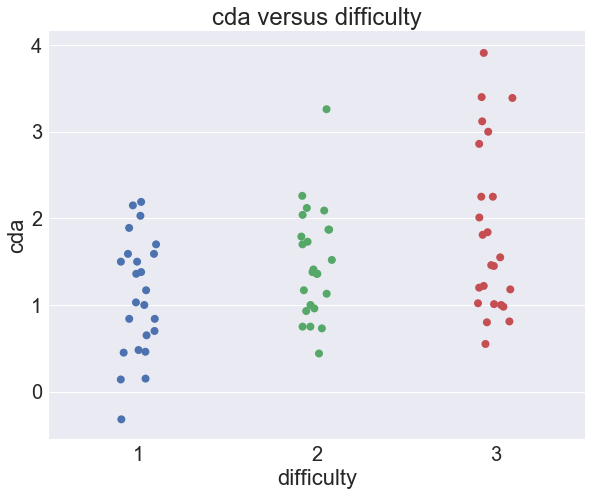

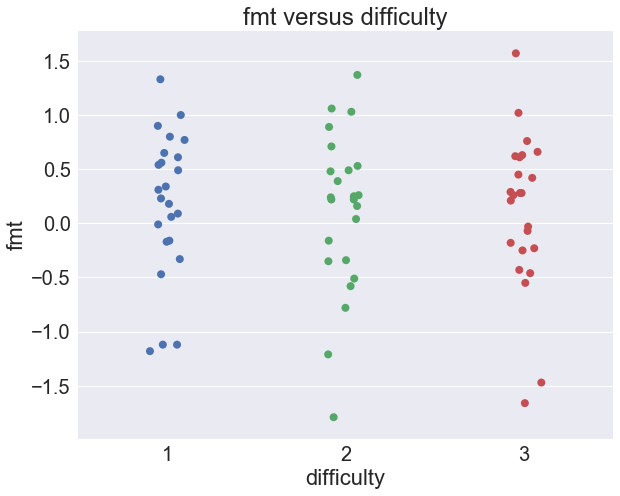

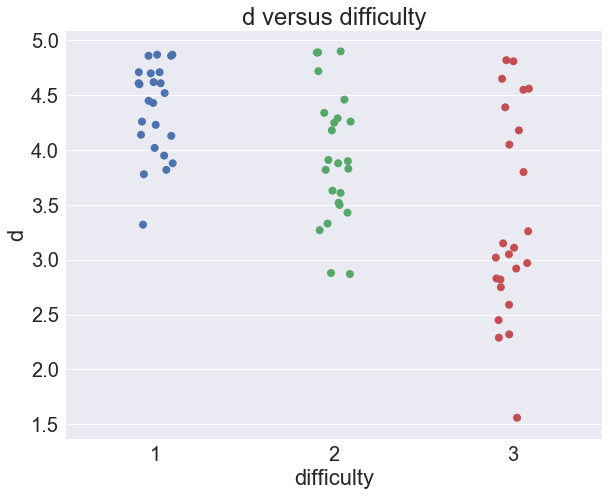

In [8]:
for measure in ["cda","fmt","d"]:
    plt.figure()
    sns.stripplot(data=pivot_data[measure],s=8,jitter=True);
    plt.ylabel(measure)
    plt.title(measure+" versus difficulty")

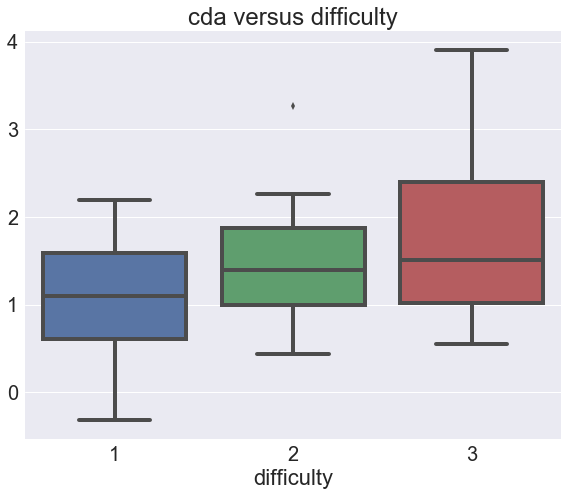

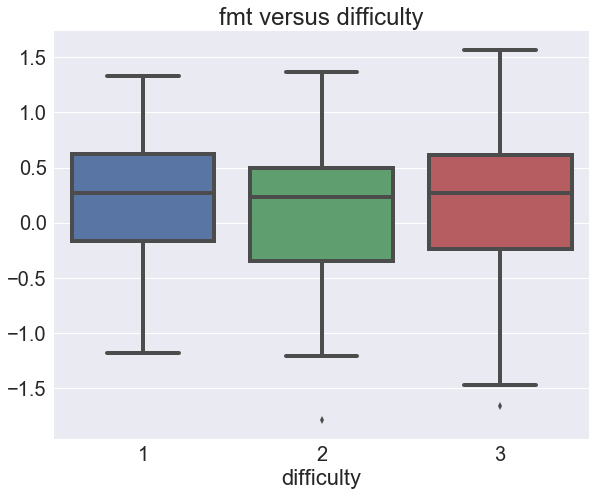

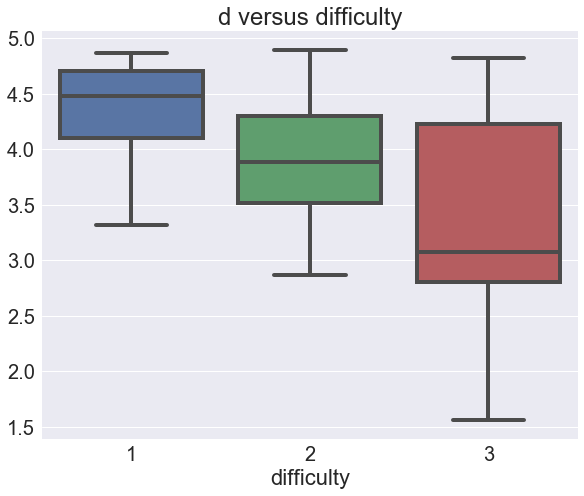

In [9]:
for measure in ["cda","fmt","d"]:
    plt.figure()
    sns.boxplot(data=pivot_data[measure],
                    linewidth=4);
    plt.title(measure+" versus difficulty")

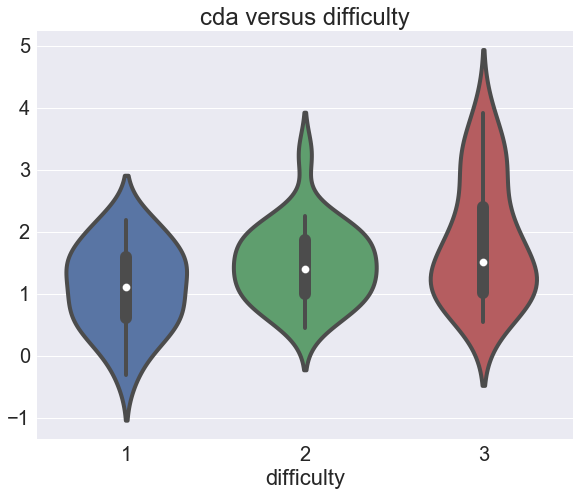

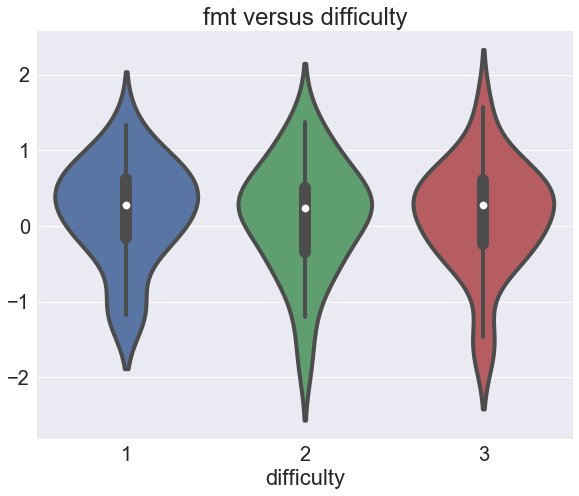

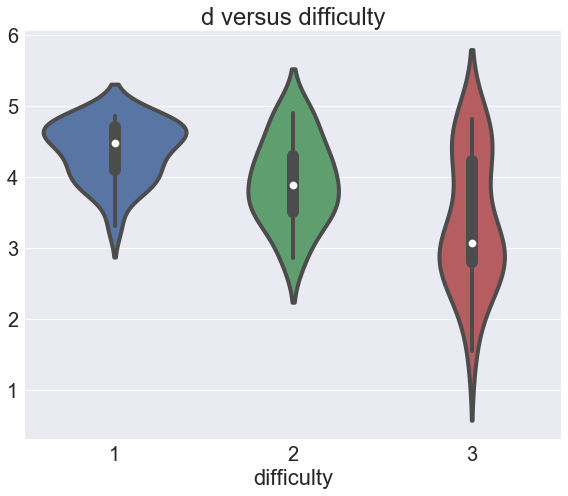

In [10]:
for measure in ["cda","fmt","d"]:
    plt.figure()
    sns.violinplot(data=pivot_data[measure],
                    linewidth=4);
    plt.title(measure+" versus difficulty")

Recall the assumptions behind ANOVA.

#### Q1 Based off of your visualization, do you think any of the assumptions of ANOVA are being violated for the case of fmt? What about d'?

<font color='#1874CD'> ** For `fmt`, all looks well. The within-variance seems to be quite different in the case of `d'`, and there's a hint of bimodality in the higher-difficulty condition.**

## ANOVA the Easy Way

### Using `scipy`

First, we'll use the built-in `scipy.stats` function `f_oneway` to perform ANOVA. This will be useful for checking our work in the next problem where we write our own "homebrew" ANOVA.

In [11]:
scipy.stats.f_oneway?

Try to organize the code you write in the cell below so that you minimize the amount you repeat yourself.

In [12]:
def run_ANOVA(data,measure):
    return scipy.stats.f_oneway(*[pivot_data[measure,key] 
                       for key in pivot_data[measure].columns])

In [13]:
# one way to do it

print("="*13)
for measure in ["cda","d","fmt"]:
    print("ANOVA for "+ measure)
    print(run_ANOVA(pivot_data,measure))
    print("="*13)

ANOVA for cda
F_onewayResult(statistic=5.3606157825487184, pvalue=0.0068547347949886664)
ANOVA for d
F_onewayResult(statistic=13.162307279101022, pvalue=1.4378683792723512e-05)
ANOVA for fmt
F_onewayResult(statistic=0.073472594633349528, pvalue=0.92923420230558784)


In [14]:
# another good alternative

measure = "fmt"

scipy.stats.f_oneway(*[pivot_data[measure,key] 
                       for key in pivot_data[measure].columns])

F_onewayResult(statistic=0.073472594633349528, pvalue=0.92923420230558784)

### Using `statsmodels`

## ANOVA the Hard Way

To get a better understanding of ANOVA, we'll now implement it from scratch.

To get started, you'll need the total number of observations $N$, the group size (here, each group is the same size), and the keys for each group (here, 1, 2, and 3, and they're stored in the second level of the column multi-index).

The first cell picks a measure to run ANOVA on. We'll want to write all of our code that follows in such a way that we can run ANOVA on the other measures just by changing this one cell.

In [15]:
measure = "cda"

In [16]:
N = len(df[measure])
group_size = len(pivot_data[measure])
groups = pivot_data.columns.levels[1]

We'll proceed by generating a new data frame that contains all the information we need to perform an ANOVA -- each row will contain the grand mean and the group mean, the explained component, and the residual for that observation.

Because we'll be doing a between-subjects (aka unblocked) ANOVA, we use the un`pivot`ed data.

#### Q2 Why is this a sub-optimal design for our statistical analysis?

<font color='#1874CD'> ** The data is within-subjects, but the test is between-subjects.**

In [17]:
anova_frame = data.copy()

The cell below computes the grand mean and the group mean for each difficulty level.

In [18]:
anova_frame["grand_mean"] = anova_frame[measure].mean()

group_means = anova_frame.groupby("difficulty")[measure].mean()

for group in groups:
    anova_frame.loc[anova_frame.difficulty==group,"group_mean"] = group_means[group]

Let's take a look at the resulting data frame.

In [19]:
anova_frame.sample(10)

,id,difficulty,d,cda,fmt,grand_mean,group_mean
1,2,1,4.87,0.70,0.34,1.474444,1.102917
5,6,1,3.82,0.84,-1.12,1.474444,1.102917
0,1,1,4.86,1.00,0.80,1.474444,1.102917
68,21,3,2.83,3.91,-0.23,1.474444,1.836250
60,13,3,2.29,0.55,0.42,1.474444,1.836250
22,23,1,3.95,1.70,0.77,1.474444,1.102917
28,5,2,3.63,0.75,-1.21,1.474444,1.484167
24,1,2,4.89,2.04,0.49,1.474444,1.484167
36,13,2,3.50,0.96,0.39,1.474444,1.484167
31,8,2,3.88,1.38,-0.58,1.474444,1.484167


There are only three unique values in the `group_mean` column, corresponding to the three group means. Calculate their average value.

In [20]:
group_means = anova_frame["group_mean"].unique()

print(group_means)

assert np.mean(group_means) - anova_frame[measure].mean() < 1e-4

[ 1.10291667  1.48416667  1.83625   ]


#### Q3 What other quantity is this equal to? What does this have to do with degrees of freedom?

<font color='#1874CD'> ** It's equal to the grand mean. If we know the grand mean, we only need two of the group means to know the other. Two is also the number of degrees of freedom.**

Now, we compute the explained and unexplained components for each observation. The explained differences are the differences between the group average and the overall average. The unexplained difference is the difference between the individual score and the group average.

The explained difference is calculated for you. Calculate the unexplained, or residual, difference.

In [21]:
anova_frame["explained"] = anova_frame["group_mean"]-anova_frame["grand_mean"]

anova_frame["residual"] = anova_frame[measure]-anova_frame["group_mean"]

To check your work, confirm that the total value for each observation is equal to the sum of the grand mean, the explained component, and the residual.

In [22]:
assert np.isclose(anova_frame[measure],anova_frame["grand_mean"] 
                                        + anova_frame["explained"]
                                          + anova_frame["residual"]).all()

Now, write a sum-of-squares function using `np.sum` and `np.square` and then use it to compute the following sum of squares values:

- total sum of squares
- sum of the grand mean squared
- sum of squares explained by the model
- residual sum of squares (component not explained by the model)

Also, calculate the explainable sum of squares from the difference of two of the above quantities.

The assertion statements in the final code block can be used to check your work.

We'll store the sums of squares in a dictionary, `sum_of_squares`, using the column name as the key.

In [23]:
anova_frame.head(10)

,id,difficulty,d,cda,fmt,grand_mean,group_mean,explained,residual
0,1,1,4.86,1.00,0.80,1.474444,1.102917,-0.371528,-0.102917
1,2,1,4.87,0.70,0.34,1.474444,1.102917,-0.371528,-0.402917
2,3,1,4.71,0.84,0.31,1.474444,1.102917,-0.371528,-0.262917
3,4,1,4.61,1.59,0.56,1.474444,1.102917,-0.371528,0.487083
4,5,1,4.71,1.59,-1.18,1.474444,1.102917,-0.371528,0.487083
5,6,1,3.82,0.84,-1.12,1.474444,1.102917,-0.371528,-0.262917
6,7,1,4.23,1.50,0.90,1.474444,1.102917,-0.371528,0.397083
7,8,1,4.52,0.45,-0.16,1.474444,1.102917,-0.371528,-0.652917
8,9,1,4.02,2.19,1.00,1.474444,1.102917,-0.371528,1.087083
9,10,1,4.26,2.15,1.33,1.474444,1.102917,-0.371528,1.047083


In [24]:
def SS(x):
    return np.sum(np.square(x))

In [25]:
sum_of_squares = {}

keys = [measure,"grand_mean","explained","residual"]

for key in keys:
    sum_of_squares[key] = SS(anova_frame[key])
    
sum_of_squares["explainable"] = sum_of_squares[measure] - sum_of_squares["grand_mean"]

In [26]:
#these should be the same, except for computer rounding error

assert( sum_of_squares[measure] - (sum_of_squares["grand_mean"] + 
                                 sum_of_squares["explainable"]) <= 1e-4 )

assert( sum_of_squares["explainable"] - (sum_of_squares["explained"] +
                                       sum_of_squares["residual"]) <= 1e-4 )

In [27]:
sum_of_squares["explained"]

6.4567361111111206

Now, calculate the following degrees of freedom in this model:

- total degrees of freedom
- the degrees of freedom of the model (or explained degrees of freedom)
- the "leftover" degrees of freedom (or the unexplained degrees of freedom)

#### Q4 The latter two should add up to $N-1$. Where does the other degree of freedom "go"? Include this degree of freedom in the `dof` dictionary with an appropriate key.

<font color='#1874CD'> ** It is used when we calculate the grand mean. This is also why our explained degrees of freedom is `k-1` -- the mean of the group means must be the grand mean. **

In [28]:
# k is the number of groups
k = len(groups)

dof = {}
vals = [N,1,k-1,N-k]

for key,val in zip(keys,vals):
    dof[key] = val

In [29]:
assert(sum([dof[key] for key in dof.keys()]) == 2*N)

Now, we calculate our estimate for the mean square of the explained and unexplained components. Note that, because we are estimating a parameter of the population, we want to use the appropriate degree of freedom instead of the raw $N$ for each average.

In [30]:
mean_square = {}

for key in ["explained","residual"]:
    mean_square[key] = sum_of_squares[key]/dof[key]

The mean square of the explained component tells us how much, on average, our hypothesis is able to improve, in terms of squared error, our guess of the value of our outcome variable over the "null" hypothesis. The bigger this is, the more supported our hypothesis is, and the less likely we are to have observed such a result if the null hypothesis were true.

However, a mean square value by itself doesn't tell you much  -- is reduction of 2 in mean squared error a "big" improvement? For our data, it would be, but for data with units in the billions and spread in the millions, it would not be. Therefore, if we want a statistic that tells us how good our hypothesis is, we need to somehow take into account the amount of unexplained variance.

The statistic used for this purpose in ANOVA is the *$F$-statistic*, named in honor of its inventor, [Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher). Compute the value of $F$ for this data below.

In [31]:
F = mean_square["explained"]/mean_square["residual"]

F

5.3606157825487237

### Calculating p

To interpret this $F$ value and so determine if the amount of variance we were able to explain is close to what one would expect by chance, we need to get a hold of the sampling distribution of the $F$-statistic. Once we have that, we can calculate the area under the curve from the observed value on up and use that to determine our p-value.

#### Q5 Why do we only calculate a "one-tailed" area, above our value, rather than a "two-tailed" area? 

<font color="1874CD"> ** We are, in this case, only interested in cases where our $F$-statistic is larger than it would be by chance. There's no meaning, statistical or practical, in an $F$-statistic that is very low. **

We have two options for acquiring the sampling distribution of $F$:

1. Use a pre-calculated distribution. In the old days, that'd mean looking up values in a table in a reference text. These days, statistical computing libraries like `scipy` provide this service via functions.
1. Simulate what our data would look like under the null hypothesis and use the distribution of the $F$-statistic from our simulations to approximate the true distribution of $F$

We'll take the second road.
This will involve a [*resampling*](https://en.wikipedia.org/wiki/Resampling_%28statistics%29) technique called an
[*approximate permutation test*](https://en.wikipedia.org/wiki/Resampling_%28statistics%29#Monte_Carlo_testing).
It is closely related to [exact tests](https://en.wikipedia.org/wiki/Exact_test),
which are covered in Chapter 7 of *Intuitive Biostatistics*.

#### Q6 Explain, in your own words, what the null hypothesis of the ANOVA test is.

<font color="1874CD"> ** The null hypothesis is that the group labels are independent of the measurement values. **

#### Q7 Under the null hypothesis of ANOVA, what can we say about the relationship between the group label and the measurement? 

<font color="1874CD"> ** Under the null hypothesis, the two are independent. **

#### Q8 Based on this relationship, how could we simulate what our data would look like under the null hypothesis? That is, how could we generate data that is distributed according to the null hypothesis?

<font color="1874CD"> ** We can take our data and shuffle the labels. **

The function `utils.estimate_f_distribution` will implement this simulation.

In [32]:
measure = "cda"

grouped_data = utils.group_data(pivot_data,measure,groups)

fs = utils.estimate_F_distribution(grouped_data)

sorted_Fs = sorted(fs)

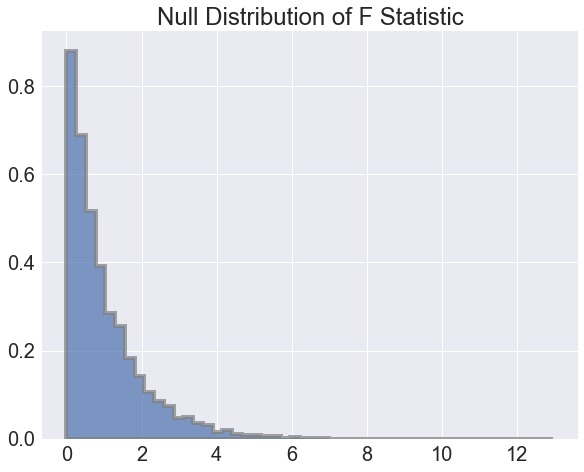

In [33]:
utils.plot_approximated_F(fs)

Using the `sorted_Fs` array, calculate an approximate p-value for the value of $F$ you calculated above. Check your work by comparing it to the value provided by `scipy.stats.f_oneway`

In [34]:
def eCDF(f,sorted_Fs):
    try:
        index = np.where(sorted_Fs > f)[0][0] #returns a tuple of arrays, we want first element of first array
    except IndexError:
        index = len(sorted_Fs)
        
    return index/len(sorted_Fs)

my_p = 1-eCDF(F, sorted_Fs)
       
_, their_p = run_ANOVA(pivot_data, measure)
       
(their_p - my_p)**2

2.1162533237508326e-06

As part of the process of generating our estimated $F$ distribution, we need to generate a bunch of data sets that are distributed according to the null hypothesis. We can use these, plus any method that calculates p-values, to simulate the distribution of p-values under the null hypothesis. The function `utils.simulateNull` will do this for us.

In [35]:
ps = utils.simulate_null(grouped_data, N=10000)

#### Q9 What sampling distribution do we expect the p-value to have under the null hypothesis? How might this distribution look different under the alternative hypothesis?

<font color="1874CD"> ** We expect the distribution of p under the null hypothesis to be uniform. As the effect size gets larger, this distribution becomes more peaked close to 0. **

In the cell below, plot the simulated sampling distribution of the p-value.

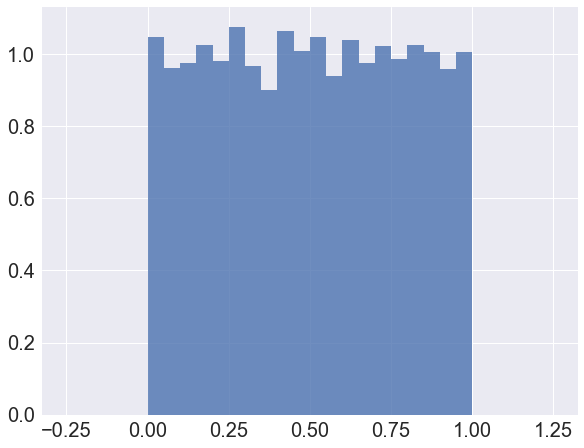

In [36]:
sns.distplot(ps,bins=np.arange(-0.25,1.3,0.05),kde=False,
             hist_kws={'histtype':'stepfilled',
                       'normed':True,
                       'linewidth':4,
                       'alpha':0.8});

## Beyond $p$ - $\eta^2$ and $\omega^2$

The $F$-statistic is used to determine the statistical significance of an ANOVA result.

#### Q10 How is this different from the practical or scientific significance of an ANOVA result?

<font color="1874CD"> ** Practical significance is determined by the sample size necessary to detect an effect and the purpose of the inquiry. Scientific significance is closer to practical significance than statistical significance.  **

The APA recommends that, in addition to reporting $F$ and $p$, scientists report the value $\eta^2$, which is equal to the ratio of the explained sum-of-squares to the explainable sum-of-squares. It's also known as the *variance explained*.

#### Q11 Why is this number closer to a notion of practical significance than $F$ is?

<font color="1874CD"> ** It tells you how much less uncertain, on average, that you become about the data values when you use your model. This more useful for practical purposes than whether the group labels and measurement values are likely independent. With a large enough $N$, you're likely to find a signficant but miniscule effect of any label. **

Calculate $\eta$ for a statistically significant test you ran above.

In [37]:
eta = sum_of_squares["explained"]/sum_of_squares["explainable"]
eta

0.13448401830499665

#### Q12 Does this seem like a practically significant fraction to you? Look back at the visualizations of the data you produced at the beginning of the lab. Are there any visual hints that would lead you to expect a value of $\eta^2$ close to what you calculated?

<font color="1874CD"> ** The heavy overlap of the groups in the case of `cda` and `fmt` indicates that the amount of variance explained is going to be low. **

Notice that $\eta$ uses the sums-of-squares, rather than mean squares. This makes it a biased estimator of the quantity it is trying to capture: it overestimates how much variance has been explained. Intuitively, it only captures how well you explained your dataset, not how well you might explain additional data from the same population.

An unbiased estimator for explained variance exists, known as $\omega^2$ (pronounced "omega-squared"). You can [read more about it here](http://daniellakens.blogspot.com/2015/06/why-you-should-use-omega-squared.html).

Use the following formula to compute $\omega^2$ for your test:

$$
    \omega^2 = \frac{F-1}{\frac{F+1+\text{df}_{residual}}{\text{df}_{explained}}}
$$

In [38]:
om_sqrd = (F-1)/((F+dof["residual"]+1)/ dof["explained"] )
om_sqrd

0.11572664945125125

#### Q13 Does this more accurate estimate change your opinion of the the practical significance of the results of your test?

<font color="1874CD"> ** The switch from $\eta$ to $\omega$ shaves a few percentage points off of the purported variance explained. For small effect sizes, this can be a substantial fraction of $\eta^2$. **